In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
reactor_power = np.linspace(0, 1000e6, 1000)  # 0 to 1000 MW in Watts

# Fraction of U-235 and U-238 in the fuel
fraction_u235 = np.linspace(0.01, 0.99, 1000)
fraction_u238 = 1 - fraction_u235

# Energy released per fission depends on isotope composition
# Typical energy per fission: U-235 = 202.5 MeV, U-238 = 205.0 MeV

energy_u235 = 202.5e6 * 1.60218e-19  # J
energy_u238 = 205.0e6 * 1.60218e-19  # J


In [ ]:

# Weighted average energy per fission
# Calculate fissions_per_second for each fraction_u235 and each reactor_power
energy_per_fission = fraction_u235[:, np.newaxis] * energy_u235 + (1 - fraction_u235[:, np.newaxis]) * energy_u238
fissions_per_second = reactor_power / energy_per_fission

In [30]:
fissions_per_second.shape

(1000, 1000)

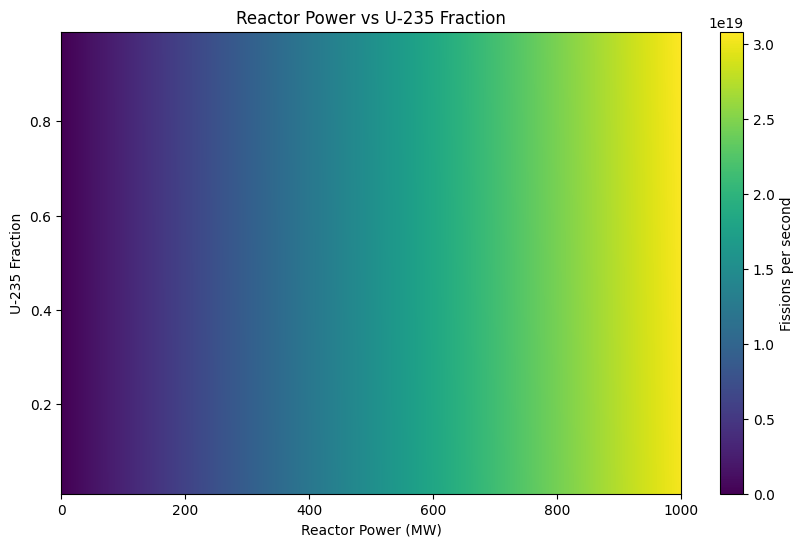

In [33]:
plt.figure(figsize=(10, 6))
im = plt.imshow(fissions_per_second, aspect='auto', origin='lower',
                extent=[reactor_power[0]/1e6, reactor_power[-1]/1e6, 0.01, 0.99])
plt.xlabel('Reactor Power (MW)')
plt.ylabel('U-235 Fraction')
plt.title('Reactor Power vs U-235 Fraction')
plt.colorbar(im, label='Fissions per second')
plt.grid(False)